<h1>PROJECT </h1>
Visage Internship <br/>
Josip Hanak and Stela Hadvinger


This will be an attempt to combine the StoneSoup framework for experimental testing
on the NuScenes dataset. Both have their independent frameworks so there is a learning curve
and merging will have its difficulties

<h3>NUSCENES</h3>

Point the devkit to the data.

In [1]:
from nuscenes.nuscenes import NuScenes


# Point dataroot to your folder
nusc = NuScenes(version='v1.0-mini', dataroot='data/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.410 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


Lets focus on one scene to avoid getting overwhelmed. <br>
One scene is a continuos sensor reading in a setting (a 20 second video, or 20 seconds worth of radar readings)

In [ ]:
my_scene = nusc.scene[0]
#my_scene


{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

Visualize the sample

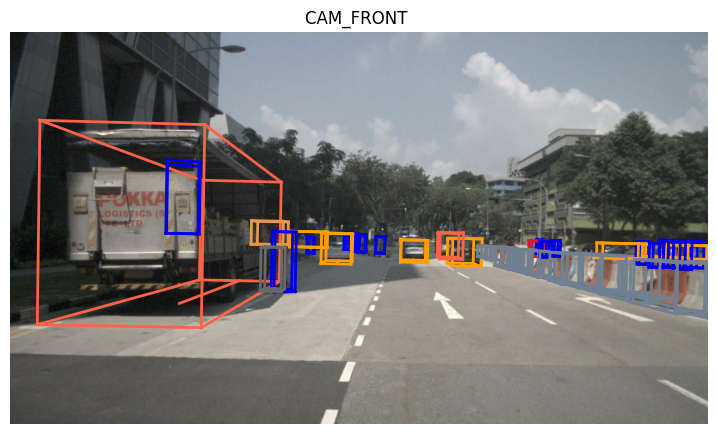

In [24]:
cam_front_data = nusc.get('sample_data', my_sample['data']["CAM_FRONT"])
nusc.render_sample_data(cam_front_data["token"])

Select the clearly viewable truck

In [ ]:
for annotation_token in my_sample["anns"]:
    annotation_object = nusc.get("sample_annotation", annotation_token)
    
    if annotation_object["category_name"] == "vehicle.truck":
       truck_annotation = annotation_object
       break

truck_annotation
nusc.render_annotation(truck_annotation["token"])



array([ 0.01800374, -0.03000624,  0.        ])

Select only the clearly visible truck and follow it for the 10 stored samples.

In [ ]:
truck_instance = nusc.get("instance", truck_annotation["instance_token"])
first_token = truck_instance["first_annotation_token"]  # string token
last_token = truck_instance["last_annotation_token"]    # string token

# Iterate through all annotations of this instance
current_token = first_token
annotations = []

while True:
    current_ann = nusc.get("sample_annotation", current_token)
    annotations.append(current_ann)
    
    if current_token == last_token:
        break
    
    current_token = current_ann["next"]


   

{'token': '83d881a6b3d94ef3a3bc3b585cc514f8', 'sample_token': 'ca9a282c9e77460f8360f564131a8af5', 'instance_token': 'e91afa15647c4c4994f19aeb302c7179', 'visibility_token': '4', 'attribute_tokens': ['58aa28b1c2a54dc88e169808c07331e3'], 'translation': [409.989, 1164.099, 1.623], 'size': [2.877, 10.201, 3.595], 'rotation': [-0.5828819500503033, 0.0, 0.0, 0.812556848660791], 'prev': '', 'next': 'f3721bdfd7ee4fd2a4f94874286df471', 'num_lidar_pts': 495, 'num_radar_pts': 13, 'category_name': 'vehicle.truck'}

{'token': 'f3721bdfd7ee4fd2a4f94874286df471', 'sample_token': '39586f9d59004284a7114a68825e8eec', 'instance_token': 'e91afa15647c4c4994f19aeb302c7179', 'visibility_token': '4', 'attribute_tokens': ['58aa28b1c2a54dc88e169808c07331e3'], 'translation': [409.998, 1164.084, 1.623], 'size': [2.877, 10.201, 3.595], 'rotation': [-0.5828819500503033, 0.0, 0.0, 0.812556848660791], 'prev': '83d881a6b3d94ef3a3bc3b585cc514f8', 'next': '3b1c9f82380a4ecdaf43febdfdbcc0a8', 'num_lidar_pts': 1216, 'num_ra

AssertionError: Error: Could not find image where annotation is visible. Try using e.g. BoxVisibility.ANY.

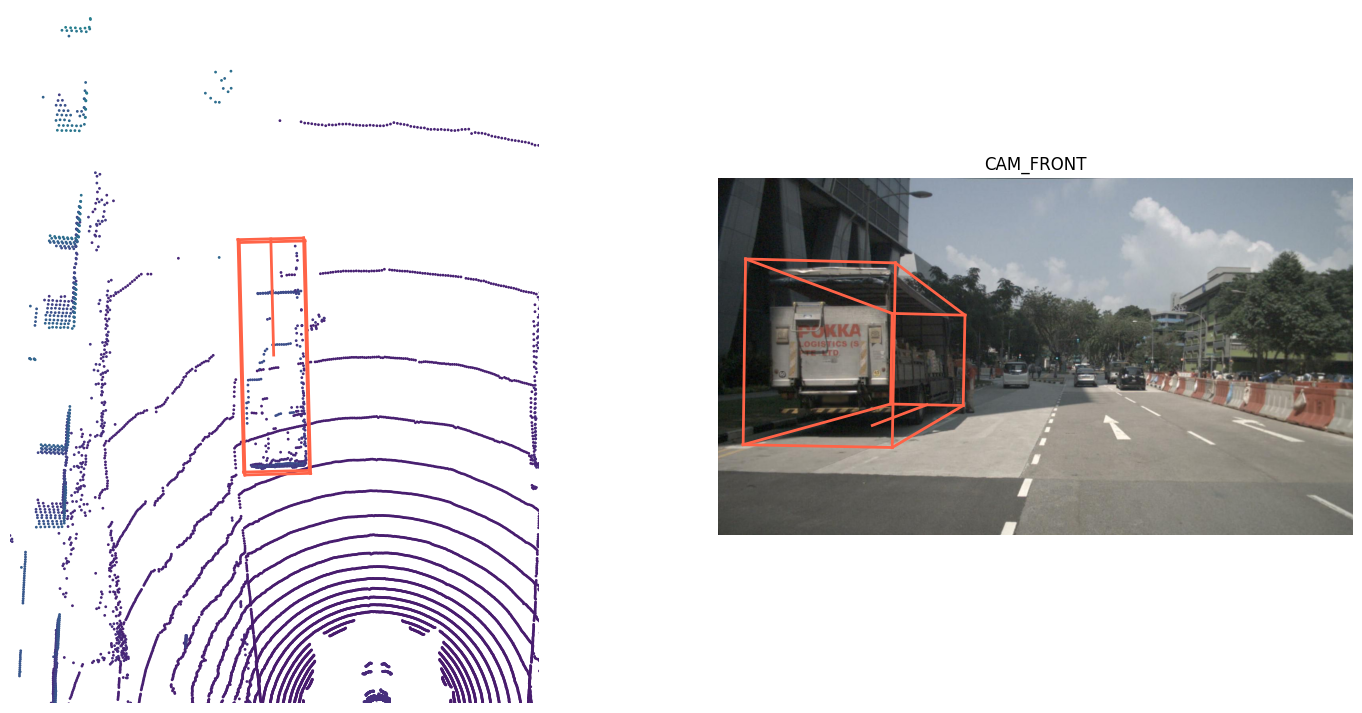

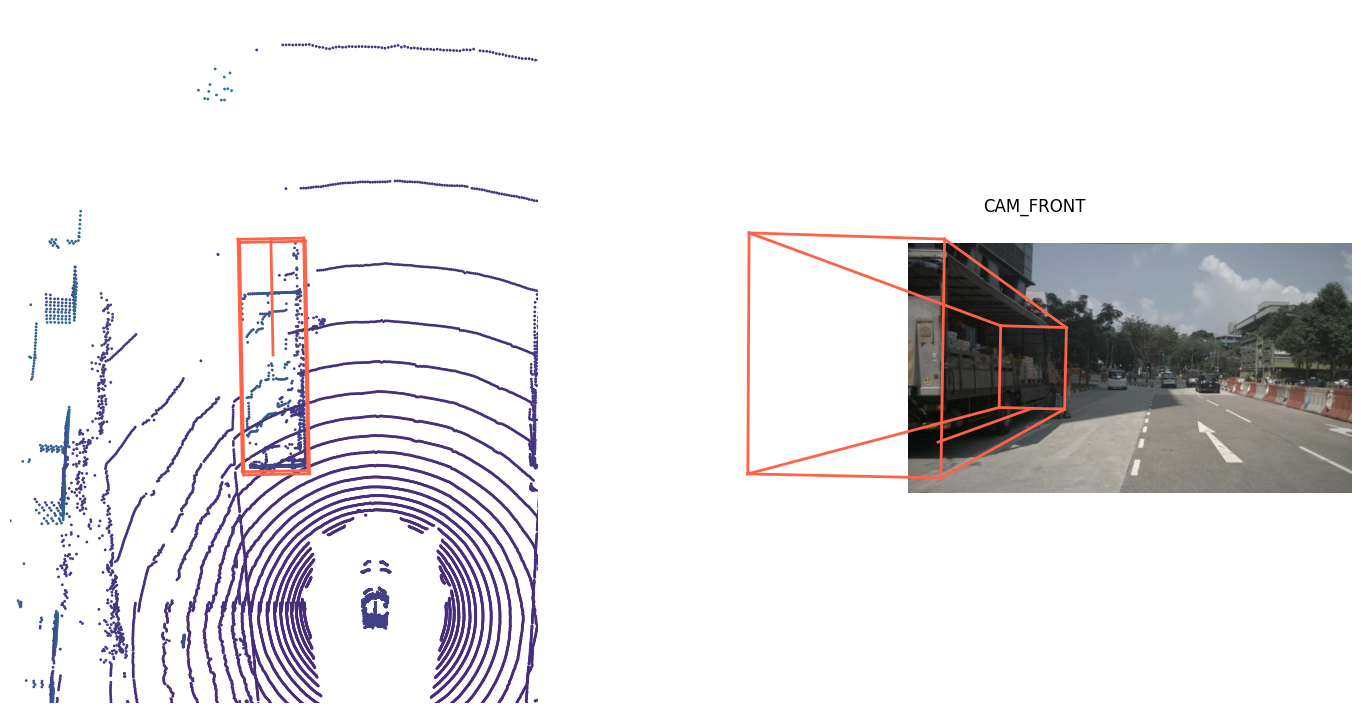

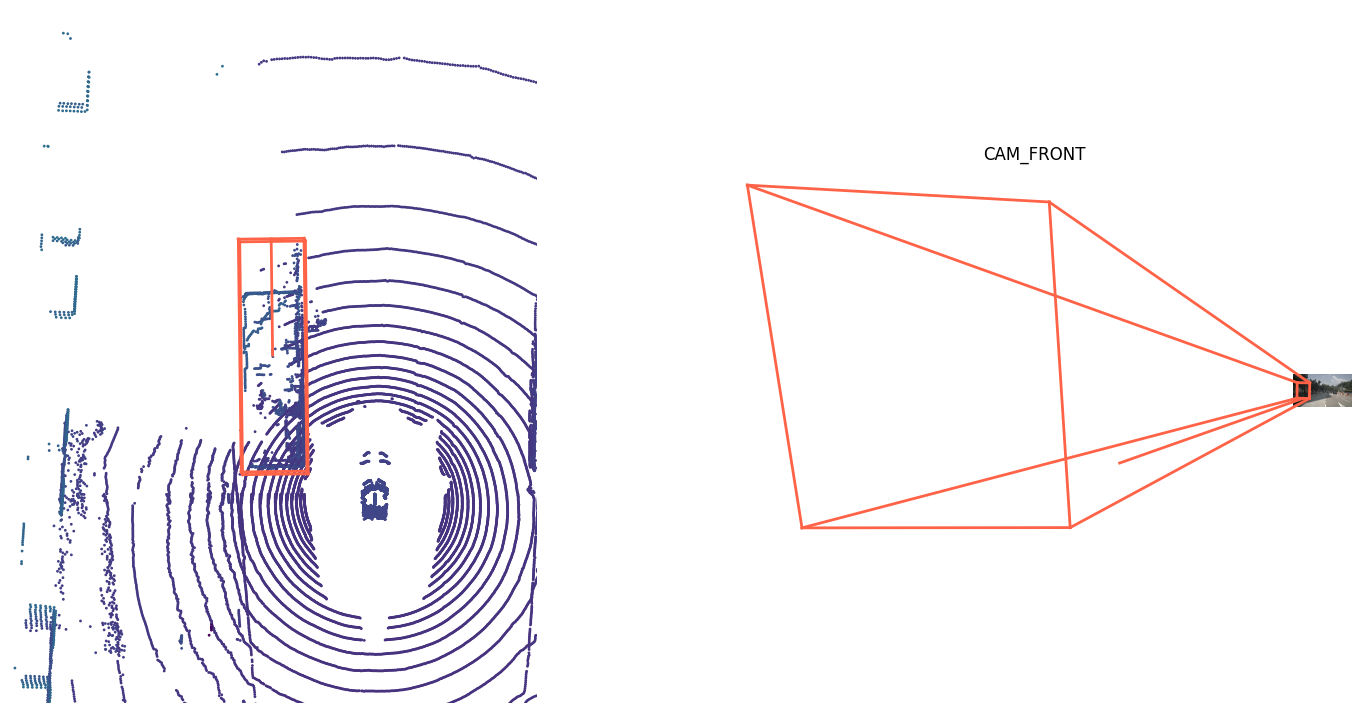

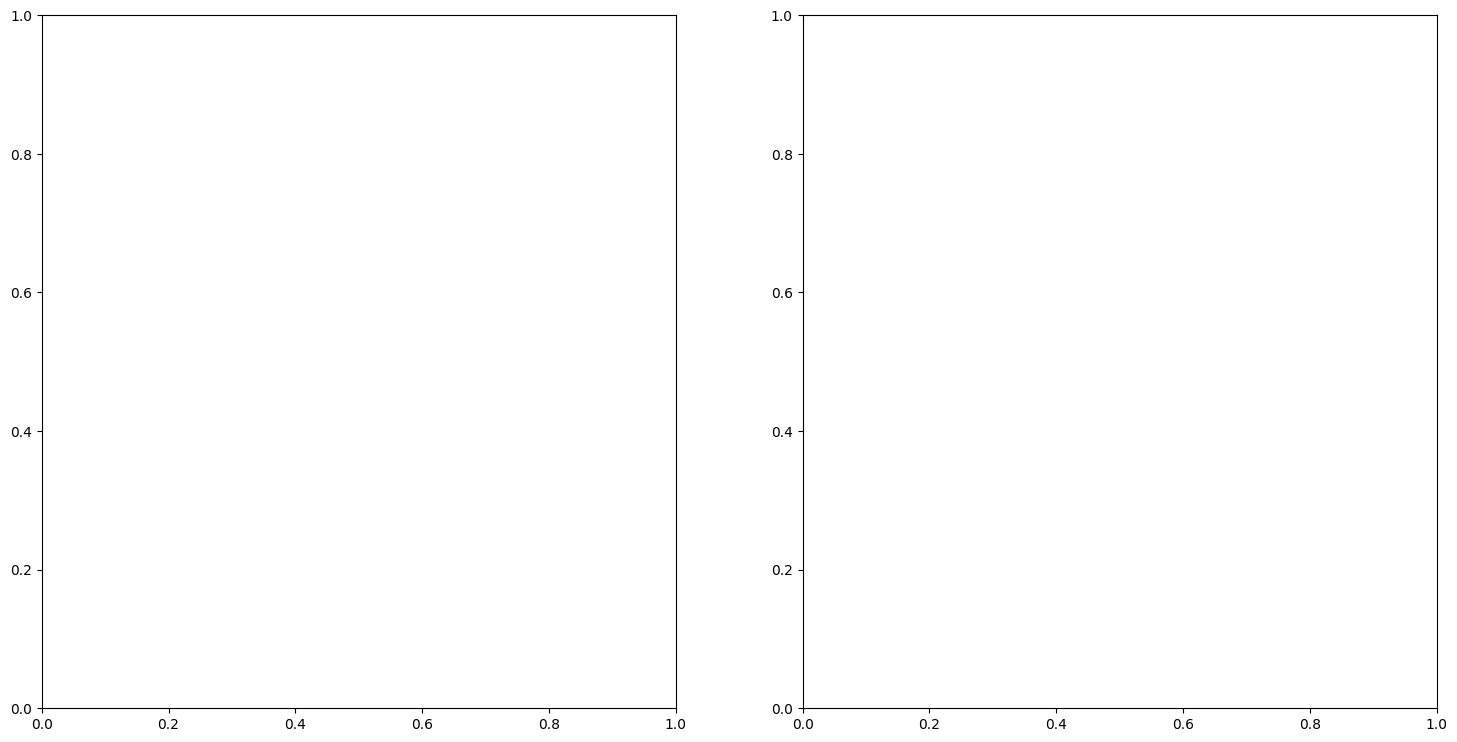

In [13]:
for annotation in annotations:
    print(annotation)

    nusc.render_annotation(annotation["token"])
    print()

#nusc.render_annotation(annotations[9]["token"])